In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_10degree = pd.read_csv('x_10degree.csv',header=None)

In [5]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [6]:
x = x_10degree[:, 0:15]

In [7]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [8]:
print(x_10degree.shape)

(654, 17)


In [9]:
y_10degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [13]:
y = y_10degree.reshape(((36*3+1)*6, 100, 100))

In [14]:
tsr = x_10degree[:, -2]

In [15]:
theta = x_10degree[:, -1]

In [16]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [17]:
print(y_train.shape)

(457, 100, 100)


In [18]:
print(y_test.shape)

(197, 100, 100)


In [19]:
print(x_train.shape)

(457, 15, 1)


In [20]:
print(x_test.shape)

(197, 15, 1)


In [21]:
theta_train

array([ 900.,  280., 1000.,  320.,  490.,  280.,   90.,  170., 1020.,
        360.,  940.,  840.,  840.,  190.,  220.,  940.,  870.,  660.,
        930.,  520.,  300.,  510.,  280.,  750.,  900.,  690., 1070.,
        440.,  750.,  120.,  920.,  340.,  680.,  140.,  370.,  830.,
        790.,  150.,  310.,  380.,  180.,  130.,  880.,   40.,   80.,
        320.,  600.,  330.,  200.,    0., 1010.,   10.,  930.,  260.,
        760.,  530.,  480.,  220.,  610.,   70.,  100.,  630.,  730.,
        800.,  350.,  840.,  500.,  440.,  540.,  850.,  460.,  430.,
        860., 1080., 1080., 1070.,  820., 1000.,  510.,  470.,  850.,
        370.,  870.,  570.,  630.,  400.,  150.,  820.,  180.,  760.,
        530.,  290.,  990.,  930.,  570.,  330.,  320.,  280.,  190.,
        630.,  940.,  120.,  250., 1010.,  600.,  980.,  350.,  270.,
        800.,  490.,  540.,  450.,  170.,  140.,  690.,   40.,   40.,
        640.,  570., 1040.,   40.,  620.,  170.,  370.,  370.,  130.,
        810.,  810.,

In [22]:
tsr_train

array([1.8, 1.6, 1.7, 1.7, 2. , 1.9, 1.5, 1.9, 1.8, 1.8, 2. , 1.7, 1.5,
       1.8, 2. , 1.6, 1.6, 1.7, 1.5, 1.9, 1.8, 2. , 1.5, 1.6, 1.9, 1.6,
       1.8, 1.6, 1.5, 2. , 1.5, 1.8, 1.5, 1.9, 1.9, 1.9, 1.6, 1.5, 1.7,
       1.7, 1.7, 1.7, 1.5, 2. , 1.6, 1.9, 1.9, 1.5, 1.7, 1.5, 2. , 1.9,
       1.8, 1.7, 1.8, 2. , 1.8, 1.5, 1.5, 1.6, 1.7, 1.7, 1.7, 2. , 1.6,
       1.8, 1.8, 2. , 1.9, 1.8, 1.5, 1.7, 1.6, 2. , 1.9, 1.5, 1.8, 2. ,
       1.9, 1.9, 1.9, 2. , 1.9, 1.9, 2. , 1.6, 1.6, 1.9, 2. , 1.6, 1.8,
       1.8, 2. , 1.7, 2. , 1.6, 1.6, 1.8, 1.5, 1.6, 1.9, 1.5, 1.5, 1.9,
       1.6, 1.8, 1.8, 1.7, 1.7, 1.9, 1.7, 1.6, 1.6, 2. , 1.7, 1.6, 1.8,
       1.6, 1.5, 1.9, 1.7, 1.7, 1.5, 1.8, 1.7, 1.9, 2. , 1.6, 2. , 2. ,
       1.8, 1.5, 1.6, 1.7, 1.9, 1.8, 1.8, 1.8, 1.5, 1.5, 1.8, 2. , 1.9,
       1.5, 1.5, 2. , 2. , 1.5, 1.9, 1.8, 1.7, 1.7, 1.9, 1.7, 1.8, 1.7,
       1.5, 1.9, 1.7, 1.5, 1.7, 1.5, 1.6, 1.7, 2. , 1.6, 2. , 1.8, 1.6,
       2. , 1.8, 2. , 2. , 1.5, 1.8, 1.6, 1.8, 1.6, 1.7, 1.6, 1.

In [23]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=2000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/2000
12/12 [==============================] - 1s 6ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 2/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 3/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1016
Epoch 4/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0983
Epoch 5/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0909
Epoch 6/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0859
Epoch 7/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0844
Epoch 8/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0840
Epoch 9/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 10/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 11/2000
12/12 [==================

12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 86/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0467
Epoch 87/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0464
Epoch 88/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0462
Epoch 89/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0459
Epoch 90/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 91/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 92/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0451
Epoch 93/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0449
Epoch 94/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0447
Epoch 95/2000
12/12 [=======================

12/12 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 169/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 170/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 171/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 172/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 173/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0293
Epoch 174/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0291
Epoch 175/2000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0290
Epoch 176/2000
12/12 [==============================] - 0s 6ms/step - loss: 9.9679e-04 - rmse: 0.0288
Epoch 177/2000
12/12 [==============================] - 0s 5ms/step - loss: 9.9347e-04 - rmse: 0.0287
Epoch 178/2000
12/12 [=====

12/12 [==============================] - 0s 6ms/step - loss: 5.9688e-04 - rmse: 0.0207
Epoch 249/2000
12/12 [==============================] - 0s 5ms/step - loss: 5.9444e-04 - rmse: 0.0206
Epoch 250/2000
12/12 [==============================] - 0s 6ms/step - loss: 5.9290e-04 - rmse: 0.0206
Epoch 251/2000
12/12 [==============================] - 0s 5ms/step - loss: 5.8838e-04 - rmse: 0.0204
Epoch 252/2000
12/12 [==============================] - 0s 5ms/step - loss: 5.8349e-04 - rmse: 0.0203
Epoch 253/2000
12/12 [==============================] - 0s 5ms/step - loss: 5.7955e-04 - rmse: 0.0202
Epoch 254/2000
12/12 [==============================] - 0s 6ms/step - loss: 5.7711e-04 - rmse: 0.0202
Epoch 255/2000
12/12 [==============================] - 0s 5ms/step - loss: 5.7424e-04 - rmse: 0.0201
Epoch 256/2000
12/12 [==============================] - 0s 5ms/step - loss: 5.7313e-04 - rmse: 0.0201
Epoch 257/2000
12/12 [==============================] - 0s 5ms/step - loss: 5.6809e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 4.1664e-04 - rmse: 0.0157
Epoch 329/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.1560e-04 - rmse: 0.0157
Epoch 330/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.1383e-04 - rmse: 0.0157
Epoch 331/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.1268e-04 - rmse: 0.0156
Epoch 332/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.1312e-04 - rmse: 0.0156
Epoch 333/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.1015e-04 - rmse: 0.0155
Epoch 334/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.0901e-04 - rmse: 0.0155
Epoch 335/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.0727e-04 - rmse: 0.0155
Epoch 336/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.0654e-04 - rmse: 0.0154
Epoch 337/2000
12/12 [==============================] - 0s 5ms/step - loss: 4.0328e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 3.2527e-04 - rmse: 0.0127
Epoch 409/2000
12/12 [==============================] - 0s 5ms/step - loss: 3.2406e-04 - rmse: 0.0126
Epoch 410/2000
12/12 [==============================] - 0s 5ms/step - loss: 3.2454e-04 - rmse: 0.0126
Epoch 411/2000
12/12 [==============================] - 0s 5ms/step - loss: 3.2397e-04 - rmse: 0.0126
Epoch 412/2000
12/12 [==============================] - 0s 5ms/step - loss: 3.2410e-04 - rmse: 0.0126
Epoch 413/2000
12/12 [==============================] - 0s 5ms/step - loss: 3.2354e-04 - rmse: 0.0126
Epoch 414/2000
12/12 [==============================] - 0s 5ms/step - loss: 3.2261e-04 - rmse: 0.0126
Epoch 415/2000
12/12 [==============================] - 0s 6ms/step - loss: 3.2077e-04 - rmse: 0.0125
Epoch 416/2000
12/12 [==============================] - 0s 6ms/step - loss: 3.2034e-04 - rmse: 0.0125
Epoch 417/2000
12/12 [==============================] - 0s 5ms/step - loss: 3.1963e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 2.7410e-04 - rmse: 0.0107
Epoch 489/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.7316e-04 - rmse: 0.0106
Epoch 490/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.7332e-04 - rmse: 0.0106
Epoch 491/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.7284e-04 - rmse: 0.0106
Epoch 492/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.7272e-04 - rmse: 0.0106
Epoch 493/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.7168e-04 - rmse: 0.0106
Epoch 494/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.7144e-04 - rmse: 0.0105
Epoch 495/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.7160e-04 - rmse: 0.0106
Epoch 496/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.7026e-04 - rmse: 0.0105
Epoch 497/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.6971e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 2.4089e-04 - rmse: 0.0093
Epoch 569/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.4038e-04 - rmse: 0.0092
Epoch 570/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.3989e-04 - rmse: 0.0092
Epoch 571/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.3907e-04 - rmse: 0.0092
Epoch 572/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.3941e-04 - rmse: 0.0092
Epoch 573/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.3943e-04 - rmse: 0.0092
Epoch 574/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.3861e-04 - rmse: 0.0092
Epoch 575/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.3813e-04 - rmse: 0.0091
Epoch 576/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.3794e-04 - rmse: 0.0091
Epoch 577/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.3827e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 2.1778e-04 - rmse: 0.0083
Epoch 649/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.1741e-04 - rmse: 0.0083
Epoch 650/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.1738e-04 - rmse: 0.0083
Epoch 651/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.1673e-04 - rmse: 0.0082
Epoch 652/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.1570e-04 - rmse: 0.0082
Epoch 653/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.1558e-04 - rmse: 0.0082
Epoch 654/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.1604e-04 - rmse: 0.0082
Epoch 655/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.1582e-04 - rmse: 0.0082
Epoch 656/2000
12/12 [==============================] - 0s 5ms/step - loss: 2.1575e-04 - rmse: 0.0082
Epoch 657/2000
12/12 [==============================] - 0s 6ms/step - loss: 2.1499e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 1.9957e-04 - rmse: 0.0075
Epoch 729/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.9967e-04 - rmse: 0.0075
Epoch 730/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.9953e-04 - rmse: 0.0075
Epoch 731/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.9901e-04 - rmse: 0.0075
Epoch 732/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.9921e-04 - rmse: 0.0075
Epoch 733/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.9852e-04 - rmse: 0.0075
Epoch 734/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.9888e-04 - rmse: 0.0075
Epoch 735/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.9847e-04 - rmse: 0.0075
Epoch 736/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.9827e-04 - rmse: 0.0075
Epoch 737/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.9776e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 1.8522e-04 - rmse: 0.0069
Epoch 809/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.8540e-04 - rmse: 0.0069
Epoch 810/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.8564e-04 - rmse: 0.0070
Epoch 811/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.8524e-04 - rmse: 0.0069
Epoch 812/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.8463e-04 - rmse: 0.0069
Epoch 813/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.8436e-04 - rmse: 0.0069
Epoch 814/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.8370e-04 - rmse: 0.0068
Epoch 815/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.8445e-04 - rmse: 0.0069
Epoch 816/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.8404e-04 - rmse: 0.0069
Epoch 817/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.8359e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 1.7370e-04 - rmse: 0.0065
Epoch 889/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.7374e-04 - rmse: 0.0065
Epoch 890/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.7374e-04 - rmse: 0.0065
Epoch 891/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.7380e-04 - rmse: 0.0065
Epoch 892/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.7325e-04 - rmse: 0.0065
Epoch 893/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.7274e-04 - rmse: 0.0064
Epoch 894/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.7324e-04 - rmse: 0.0065
Epoch 895/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.7236e-04 - rmse: 0.0064
Epoch 896/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.7216e-04 - rmse: 0.0064
Epoch 897/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.7194e-04 - rmse: 0.

12/12 [==============================] - 0s 5ms/step - loss: 1.6329e-04 - rmse: 0.0061
Epoch 969/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6339e-04 - rmse: 0.0061
Epoch 970/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6258e-04 - rmse: 0.0060
Epoch 971/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6249e-04 - rmse: 0.0060
Epoch 972/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6217e-04 - rmse: 0.0060
Epoch 973/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6233e-04 - rmse: 0.0060
Epoch 974/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6246e-04 - rmse: 0.0061
Epoch 975/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6263e-04 - rmse: 0.0061
Epoch 976/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6201e-04 - rmse: 0.0060
Epoch 977/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.6180e-04 - rmse: 0.

Epoch 1048/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5401e-04 - rmse: 0.0057
Epoch 1049/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5397e-04 - rmse: 0.0057
Epoch 1050/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5388e-04 - rmse: 0.0057
Epoch 1051/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5398e-04 - rmse: 0.0057
Epoch 1052/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5413e-04 - rmse: 0.0058
Epoch 1053/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5399e-04 - rmse: 0.0058
Epoch 1054/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5392e-04 - rmse: 0.0058
Epoch 1055/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5386e-04 - rmse: 0.0058
Epoch 1056/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.5356e-04 - rmse: 0.0057
Epoch 1057/2000
12/12 [==============================] - 0s 5ms/step - lo

12/12 [==============================] - 0s 5ms/step - loss: 1.4708e-04 - rmse: 0.0055
Epoch 1128/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4655e-04 - rmse: 0.0055
Epoch 1129/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4697e-04 - rmse: 0.0055
Epoch 1130/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4640e-04 - rmse: 0.0055
Epoch 1131/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4646e-04 - rmse: 0.0055
Epoch 1132/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4651e-04 - rmse: 0.0055
Epoch 1133/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4599e-04 - rmse: 0.0055
Epoch 1134/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4576e-04 - rmse: 0.0055
Epoch 1135/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4610e-04 - rmse: 0.0055
Epoch 1136/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4601e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.4068e-04 - rmse: 0.0054
Epoch 1207/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3999e-04 - rmse: 0.0053
Epoch 1208/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4071e-04 - rmse: 0.0054
Epoch 1209/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.4058e-04 - rmse: 0.0054
Epoch 1210/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3980e-04 - rmse: 0.0053
Epoch 1211/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3996e-04 - rmse: 0.0053
Epoch 1212/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3955e-04 - rmse: 0.0053
Epoch 1213/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3949e-04 - rmse: 0.0053
Epoch 1214/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3931e-04 - rmse: 0.0053
Epoch 1215/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3970e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.3417e-04 - rmse: 0.0051
Epoch 1286/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3434e-04 - rmse: 0.0052
Epoch 1287/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3374e-04 - rmse: 0.0051
Epoch 1288/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3365e-04 - rmse: 0.0051
Epoch 1289/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3374e-04 - rmse: 0.0051
Epoch 1290/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3342e-04 - rmse: 0.0051
Epoch 1291/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3337e-04 - rmse: 0.0051
Epoch 1292/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3311e-04 - rmse: 0.0051
Epoch 1293/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3286e-04 - rmse: 0.0050
Epoch 1294/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.3354e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.2830e-04 - rmse: 0.0049
Epoch 1365/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2867e-04 - rmse: 0.0050
Epoch 1366/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2827e-04 - rmse: 0.0049
Epoch 1367/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2815e-04 - rmse: 0.0049
Epoch 1368/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2844e-04 - rmse: 0.0050
Epoch 1369/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2870e-04 - rmse: 0.0050
Epoch 1370/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2828e-04 - rmse: 0.0050
Epoch 1371/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2830e-04 - rmse: 0.0050
Epoch 1372/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2811e-04 - rmse: 0.0049
Epoch 1373/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2809e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.2279e-04 - rmse: 0.0047
Epoch 1444/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2292e-04 - rmse: 0.0047
Epoch 1445/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2331e-04 - rmse: 0.0048
Epoch 1446/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2327e-04 - rmse: 0.0048
Epoch 1447/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2311e-04 - rmse: 0.0048
Epoch 1448/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2283e-04 - rmse: 0.0048
Epoch 1449/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2276e-04 - rmse: 0.0048
Epoch 1450/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2314e-04 - rmse: 0.0048
Epoch 1451/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2403e-04 - rmse: 0.0049
Epoch 1452/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.2373e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.1847e-04 - rmse: 0.0046
Epoch 1523/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.1815e-04 - rmse: 0.0046
Epoch 1524/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1790e-04 - rmse: 0.0046
Epoch 1525/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.1854e-04 - rmse: 0.0046
Epoch 1526/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.1876e-04 - rmse: 0.0047
Epoch 1527/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.1920e-04 - rmse: 0.0047
Epoch 1528/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1892e-04 - rmse: 0.0047
Epoch 1529/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1922e-04 - rmse: 0.0047
Epoch 1530/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1958e-04 - rmse: 0.0048
Epoch 1531/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1886e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.1440e-04 - rmse: 0.0045
Epoch 1602/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1446e-04 - rmse: 0.0045
Epoch 1603/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1449e-04 - rmse: 0.0045
Epoch 1604/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1444e-04 - rmse: 0.0045
Epoch 1605/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1477e-04 - rmse: 0.0046
Epoch 1606/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1481e-04 - rmse: 0.0046
Epoch 1607/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1437e-04 - rmse: 0.0045
Epoch 1608/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1400e-04 - rmse: 0.0045
Epoch 1609/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1415e-04 - rmse: 0.0045
Epoch 1610/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1406e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.1085e-04 - rmse: 0.0044
Epoch 1681/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1044e-04 - rmse: 0.0044
Epoch 1682/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1054e-04 - rmse: 0.0044
Epoch 1683/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1073e-04 - rmse: 0.0044
Epoch 1684/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1095e-04 - rmse: 0.0045
Epoch 1685/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1087e-04 - rmse: 0.0045
Epoch 1686/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1025e-04 - rmse: 0.0044
Epoch 1687/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.1034e-04 - rmse: 0.0044
Epoch 1688/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.1003e-04 - rmse: 0.0044
Epoch 1689/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.1008e-04 -

12/12 [==============================] - 0s 6ms/step - loss: 1.0707e-04 - rmse: 0.0043
Epoch 1760/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0729e-04 - rmse: 0.0044
Epoch 1761/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0679e-04 - rmse: 0.0043
Epoch 1762/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0639e-04 - rmse: 0.0043
Epoch 1763/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0686e-04 - rmse: 0.0043
Epoch 1764/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0687e-04 - rmse: 0.0043
Epoch 1765/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0652e-04 - rmse: 0.0043
Epoch 1766/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0669e-04 - rmse: 0.0043
Epoch 1767/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0673e-04 - rmse: 0.0043
Epoch 1768/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0663e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.0370e-04 - rmse: 0.0042
Epoch 1839/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0361e-04 - rmse: 0.0042
Epoch 1840/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0403e-04 - rmse: 0.0043
Epoch 1841/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0390e-04 - rmse: 0.0043
Epoch 1842/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0384e-04 - rmse: 0.0043
Epoch 1843/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0349e-04 - rmse: 0.0042
Epoch 1844/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0326e-04 - rmse: 0.0042
Epoch 1845/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0316e-04 - rmse: 0.0042
Epoch 1846/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0290e-04 - rmse: 0.0042
Epoch 1847/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0318e-04 -

12/12 [==============================] - 0s 6ms/step - loss: 1.0060e-04 - rmse: 0.0041
Epoch 1918/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0088e-04 - rmse: 0.0042
Epoch 1919/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0124e-04 - rmse: 0.0042
Epoch 1920/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0158e-04 - rmse: 0.0043
Epoch 1921/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0082e-04 - rmse: 0.0042
Epoch 1922/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0032e-04 - rmse: 0.0041
Epoch 1923/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0007e-04 - rmse: 0.0041
Epoch 1924/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0018e-04 - rmse: 0.0041
Epoch 1925/2000
12/12 [==============================] - 0s 6ms/step - loss: 1.0023e-04 - rmse: 0.0041
Epoch 1926/2000
12/12 [==============================] - 0s 5ms/step - loss: 1.0085e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 9.7416e-05 - rmse: 0.0040
Epoch 1997/2000
12/12 [==============================] - 0s 6ms/step - loss: 9.7409e-05 - rmse: 0.0040
Epoch 1998/2000
12/12 [==============================] - 0s 5ms/step - loss: 9.7479e-05 - rmse: 0.0040
Epoch 1999/2000
12/12 [==============================] - 0s 5ms/step - loss: 9.7812e-05 - rmse: 0.0041
Epoch 2000/2000
12/12 [==============================] - 0s 5ms/step - loss: 9.7671e-05 - rmse: 0.0041


In [27]:
time = end - start
print("Training time:", time)

Training time: 0:02:12.904985


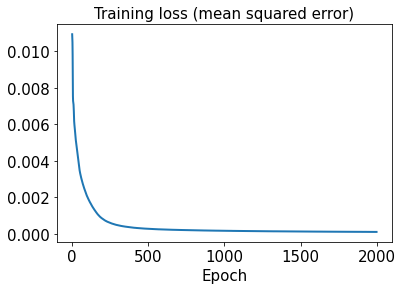

In [28]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

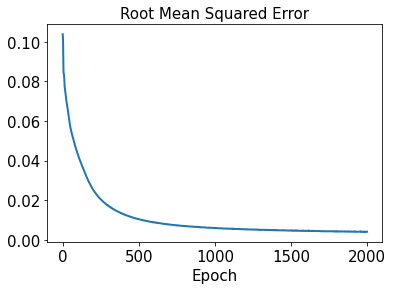

In [29]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [30]:
test_results = sd.evaluate(x_train)

15/15 [==============================] - 0s 2ms/step - loss: 8.1040e-05 - rmse: 0.0000e+00


In [31]:
decoded_train = sd.predict(x_train)

In [32]:
decoded_test = sd.predict(x_test)

In [33]:
error_train_abs = np.abs(decoded_train - y_train)

In [34]:
error_test_abs = np.abs(decoded_test - y_test)

In [35]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0014991191


In [36]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.030844556


In [37]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [38]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

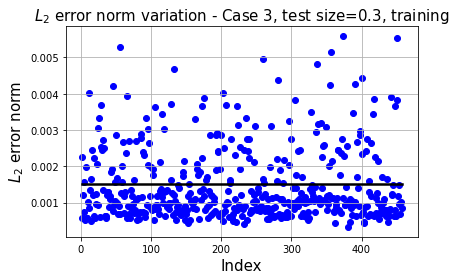

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

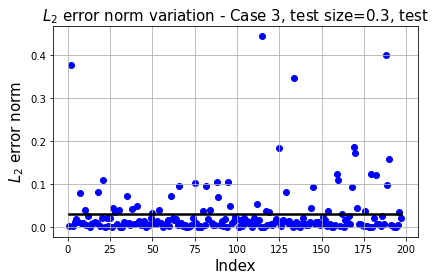

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

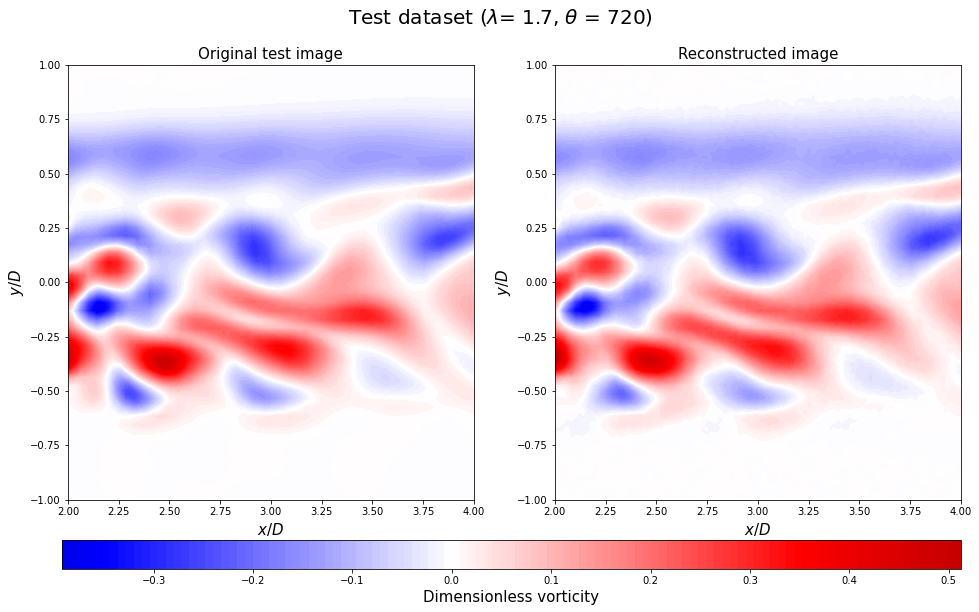

In [43]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

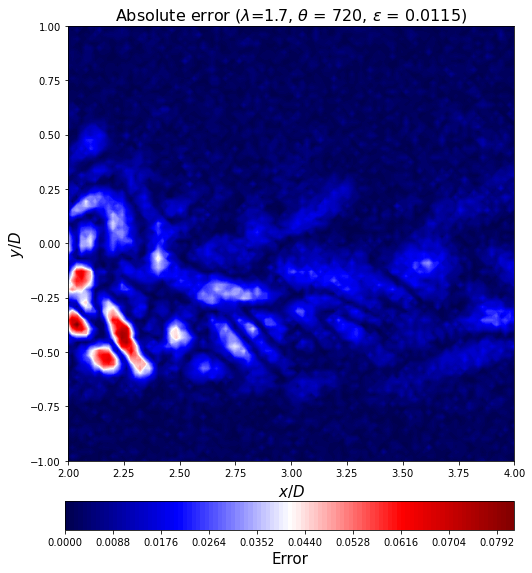

In [42]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()